# **Thống kê đặc điểm của dữ liệu bằng data visualization**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

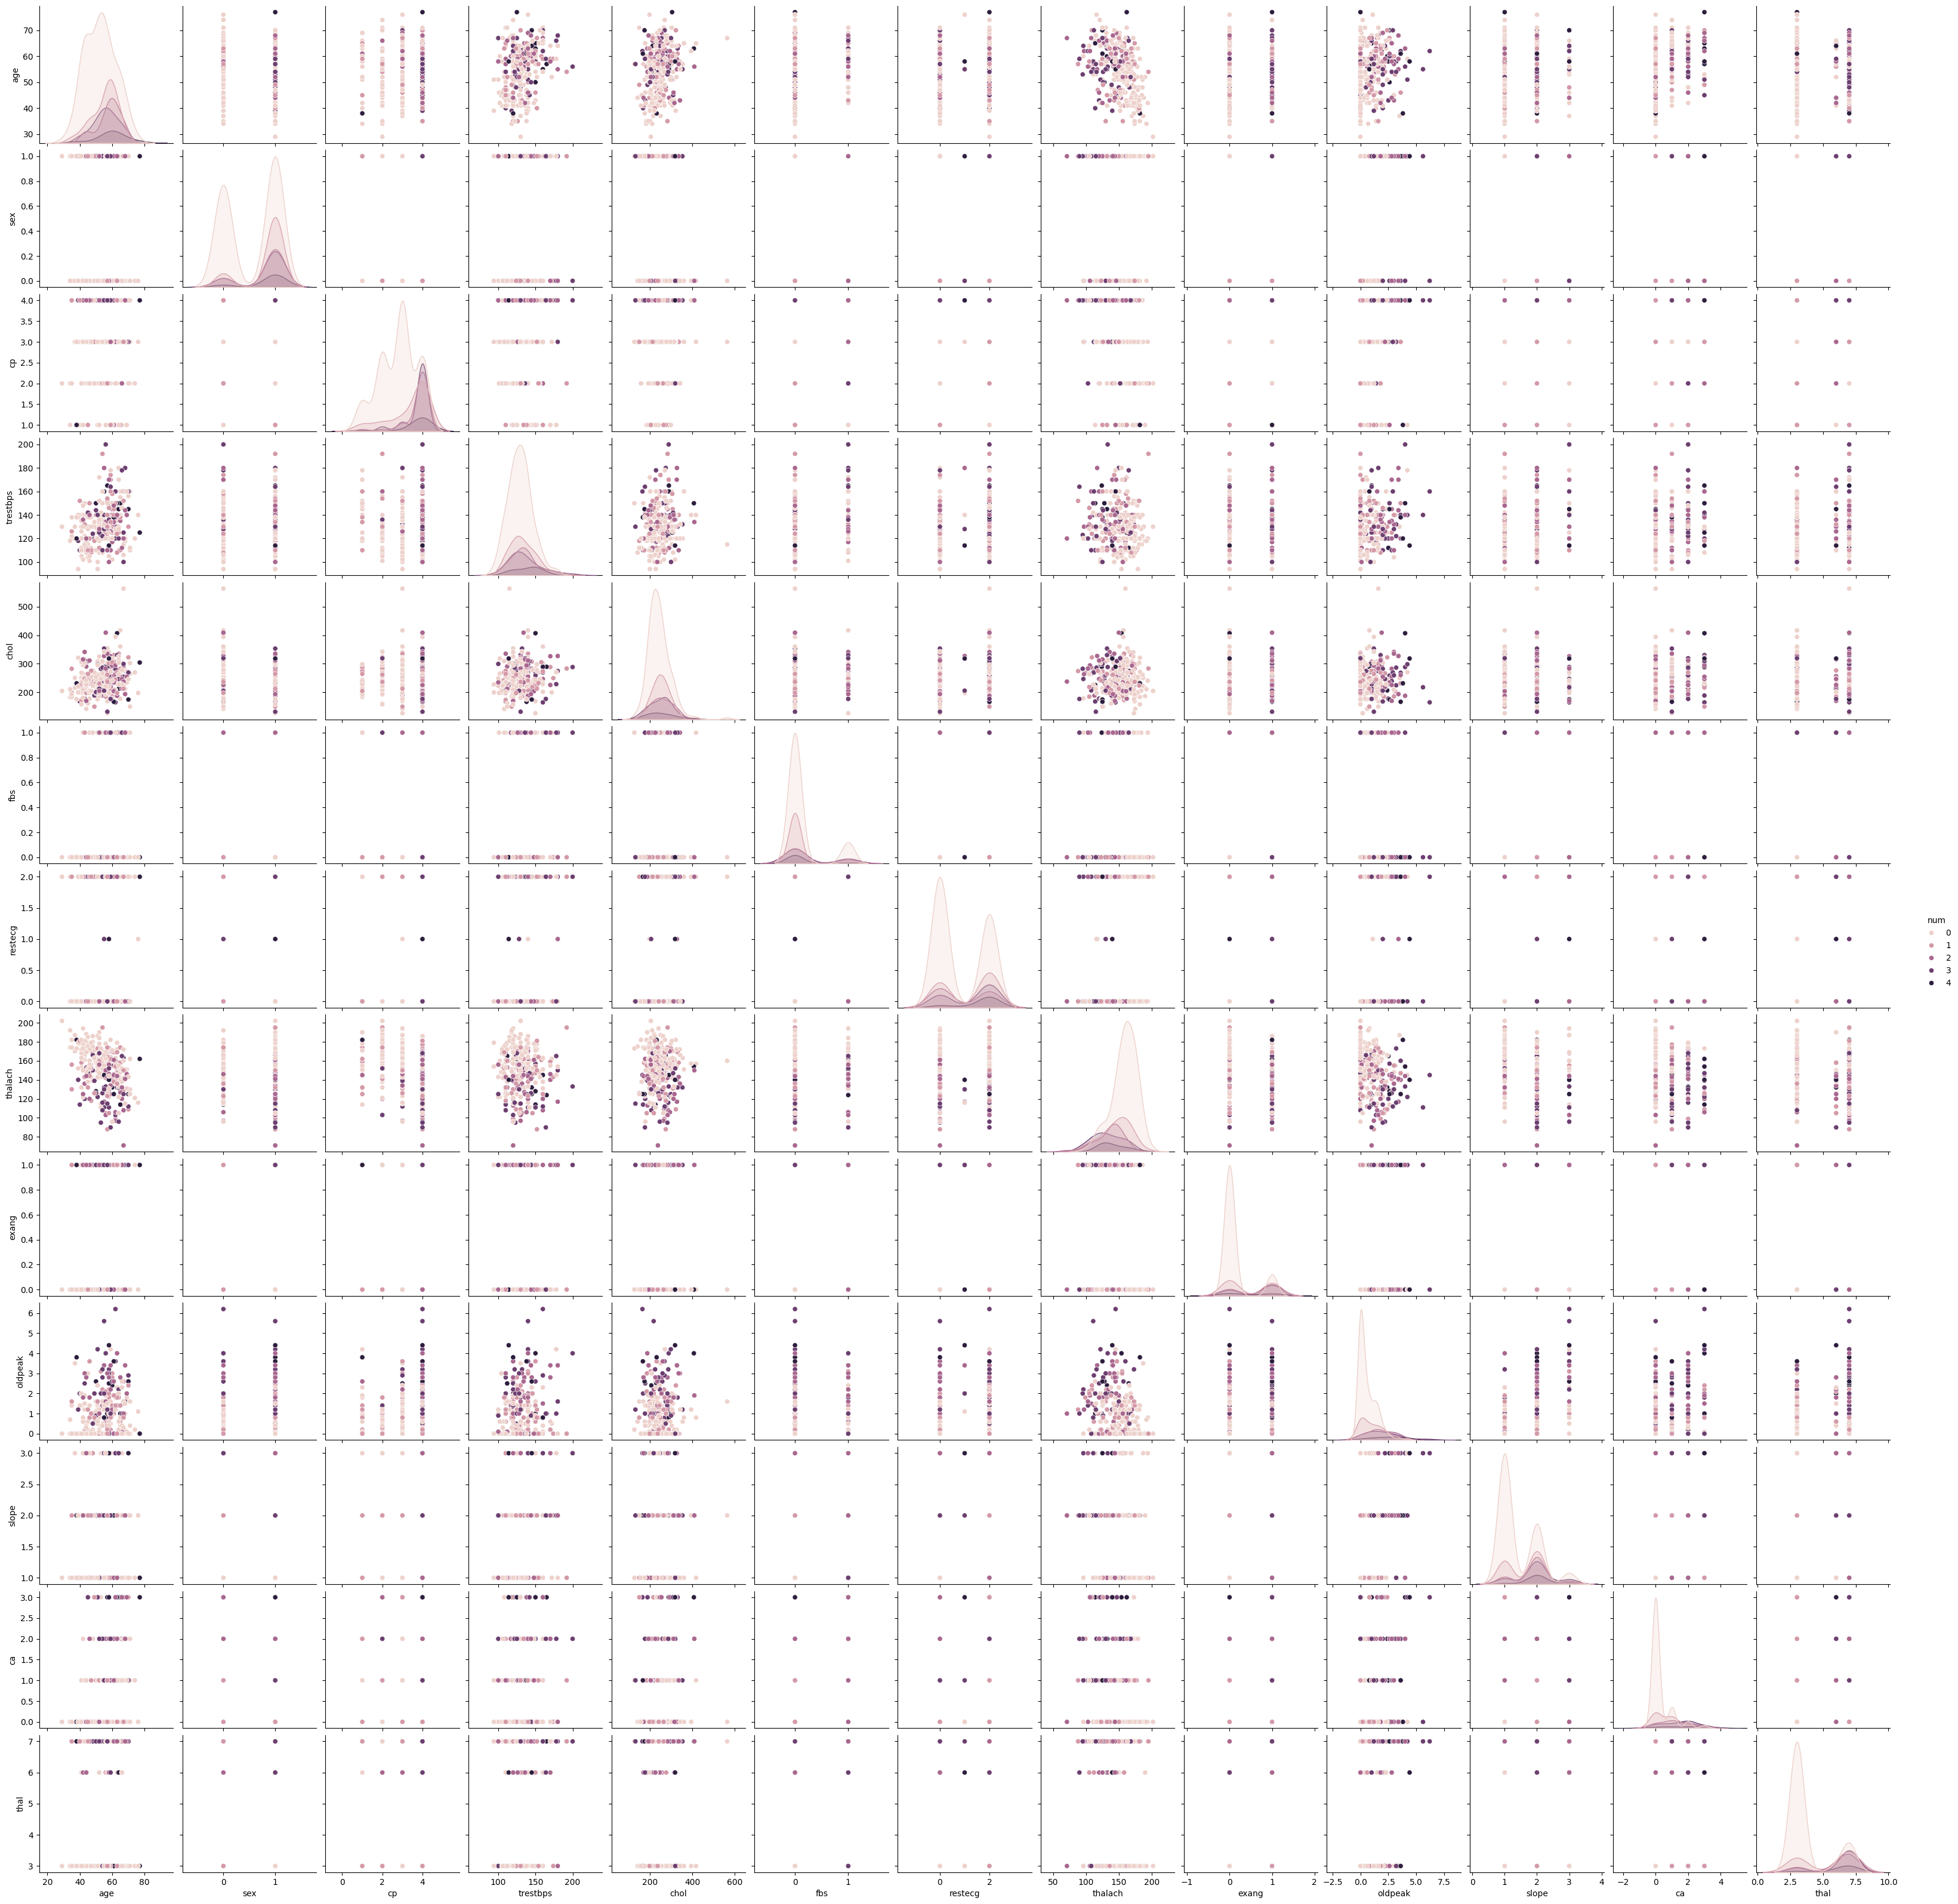

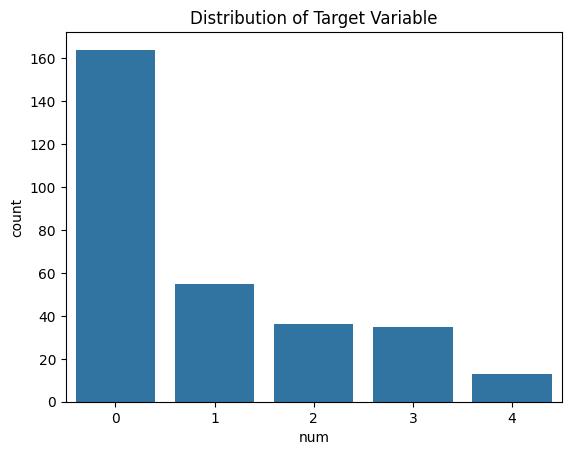

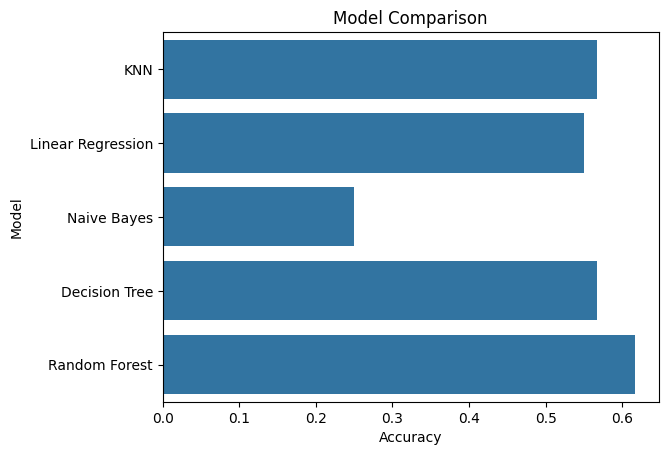

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

print(df.info())
print(df.describe())

sns.pairplot(df, hue='num')
plt.show()

sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable')
plt.show()

y = df['num']
X = df.drop(columns=['num'])

X = X.dropna()
y = y[X.index]

binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numeric_cols = ['age', 'trestbps', 'chol', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
results.append(('KNN', knn_accuracy))

# Hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Đánh giá hồi quy tuyến tính (chuyển đổi thành nhị phân nếu cần)
linear_predictions_binary = (linear_predictions >= 0.5).astype(int)
linear_accuracy = accuracy_score(y_test, linear_predictions_binary)
results.append(('Linear Regression', linear_accuracy))

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
results.append(('Naive Bayes', naive_bayes_accuracy))

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
results.append(('Decision Tree', decision_tree_accuracy))

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
results.append(('Random Forest', random_forest_accuracy))

# Bước 5: Đánh giá kết quả và so sánh các phương pháp
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Vẽ biểu đồ so sánh
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Comparison')
plt.show()


In [7]:
#Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
!pip install ucimlrepo

In [4]:
# Xử lý dữ liệu
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Bước 1: Đọc dữ liệu từ URL
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

# Bước 2: Định nghĩa Biến Mục Tiêu
y = df['num']

# Bước 3: Tạo Tập Đặc Trưng
X = df.drop(columns=['num'])

# Bước 4: Dọn Dẹp Dữ Liệu
X = X.dropna()
y = y[X.index]

X = X.drop_duplicates()
y = y[X.index]

cols_to_strip = ['cp', 'slope', 'thal', 'restecg']
for col in cols_to_strip:
    if X[col].dtype == 'object':
        X[col] = X[col].str.strip()

# Bước 5: Tiền Xử Lý Cột 'thal'
if X['thal'].dtype == 'object':
    X['thal'] = X['thal'].astype('category').cat.codes

# Bước 6: Chuyển Đổi Biến
binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Bước 7: Chia Dữ Liệu Thành Tập Huấn Luyện và Kiểm Tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (237, 18)
Kích thước tập kiểm tra: (60, 18)


# **Giải bài toán theo 2 hướng là Classification và Regression**

In [5]:
#Theo hướng Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

y = df['num']
X = df.drop(columns=['num'])

X = X.fillna(X.mean())
y = y[X.index]

binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numeric_cols = ['age', 'trestbps', 'chol', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='macro', zero_division=0)
knn_recall = recall_score(y_test, knn_predictions, average='macro')
knn_f1 = f1_score(y_test, knn_predictions, average='macro')

print("KNN Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}\n")

# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='macro', zero_division=0)
svm_recall = recall_score(y_test, svm_predictions, average='macro')
svm_f1 = f1_score(y_test, svm_predictions, average='macro')

print("SVM Results:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-Score: {svm_f1}\n")

# 3. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_precision = precision_score(y_test, naive_bayes_predictions, average='macro', zero_division=0)
naive_bayes_recall = recall_score(y_test, naive_bayes_predictions, average='macro')
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions, average='macro')

print("Naive Bayes Results:")
print(f"Accuracy: {naive_bayes_accuracy}")
print(f"Precision: {naive_bayes_precision}")
print(f"Recall: {naive_bayes_recall}")
print(f"F1-Score: {naive_bayes_f1}\n")

KNN Results:
Accuracy: 0.45901639344262296
Precision: 0.20794573643410855
Recall: 0.24622331691297208
F1-Score: 0.22042735042735045

SVM Results:
Accuracy: 0.47540983606557374
Precision: 0.2346236559139785
Recall: 0.28035030103995623
F1-Score: 0.24787878787878787

Naive Bayes Results:
Accuracy: 0.11475409836065574
Precision: 0.2868253968253968
Recall: 0.13814997263273124
F1-Score: 0.12047619047619047



In [6]:
#Theo hướng Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

y = df['num']
X = df.drop(columns=['num'])

X = X.dropna()
y = y[X.index]

binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numeric_cols = ['age', 'trestbps', 'chol', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

linear_mse, linear_mae, linear_r2 = evaluate_regression(y_test, linear_predictions)

print("Linear Regression Results:")
print(f"MSE: {linear_mse}")
print(f"MAE: {linear_mae}")
print(f"R^2 Score: {linear_r2}\n")

# 2. Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

rf_mse, rf_mae, rf_r2 = evaluate_regression(y_test, random_forest_predictions)

print("Random Forest Regressor Results:")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"R^2 Score: {rf_r2}\n")

# 4. K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_mse, knn_mae, knn_r2 = evaluate_regression(y_test, knn_predictions)

print("K-Nearest Neighbors Regressor Results:")
print(f"MSE: {knn_mse}")
print(f"MAE: {knn_mae}")
print(f"R^2 Score: {knn_r2}\n")

Linear Regression Results:
MSE: 0.8315287536743805
MAE: 0.6444303389752595
R^2 Score: 0.4744551416383832

Random Forest Regressor Results:
MSE: 0.8901966666666666
MAE: 0.657
R^2 Score: 0.43737570224719113

K-Nearest Neighbors Regressor Results:
MSE: 1.204666666666667
MAE: 0.7300000000000001
R^2 Score: 0.23862359550561796



# **So sánh giữa các thuật toán Classification**

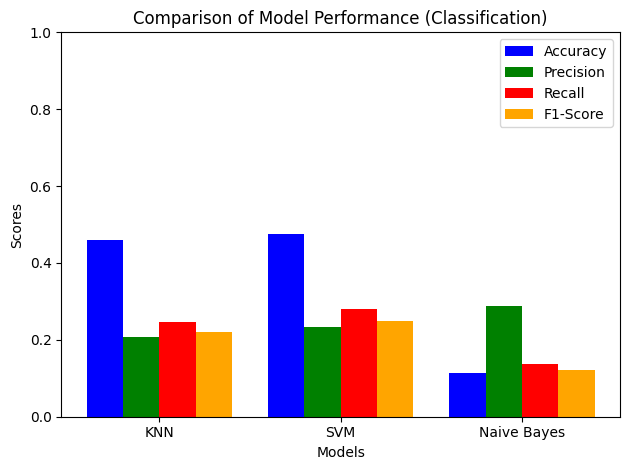

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'SVM', 'Naive Bayes']
accuracy = [0.45901639344262296, 0.47540983606557374, 0.11475409836065574]
precision = [0.20794573643410855, 0.2346236559139785, 0.2868253968253968]
recall = [0.24622331691297208, 0.28035030103995623, 0.13814997263273124]
f1_score = [0.22042735042735045, 0.24787878787878787, 0.12047619047619047]

scores = np.array([accuracy, precision, recall, f1_score])

bar_width = 0.2
x = np.arange(len(models))

plt.bar(x - 1.5 * bar_width, scores[0], width=bar_width, label='Accuracy', color='b')
plt.bar(x - 0.5 * bar_width, scores[1], width=bar_width, label='Precision', color='g')
plt.bar(x + 0.5 * bar_width, scores[2], width=bar_width, label='Recall', color='r')
plt.bar(x + 1.5 * bar_width, scores[3], width=bar_width, label='F1-Score', color='orange')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance (Classification)')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

# **So sánh các thuật toán Regression**

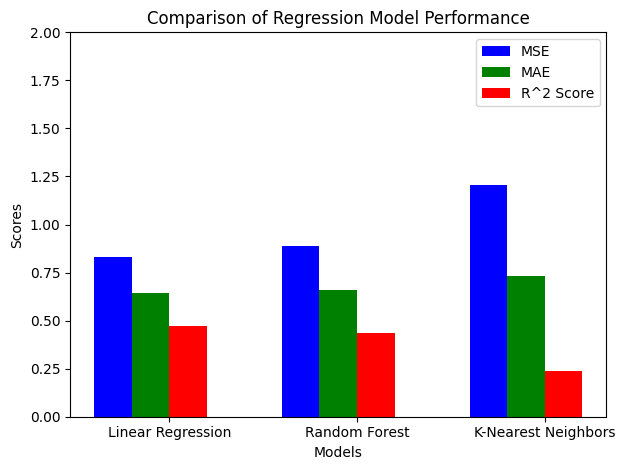

In [8]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbors']
mse = [0.8315287536743805, 0.8901966666666666, 1.204666666666667]
mae = [0.6444303389752595, 0.657, 0.7300000000000001]
r2_score = [0.4744551416383832, 0.43737570224719113, 0.23862359550561796]

scores = np.array([mse, mae, r2_score])

bar_width = 0.2
x = np.arange(len(models))

plt.bar(x - 1.5 * bar_width, scores[0], width=bar_width, label='MSE', color='b')
plt.bar(x - 0.5 * bar_width, scores[1], width=bar_width, label='MAE', color='g')
plt.bar(x + 0.5 * bar_width, scores[2], width=bar_width, label='R^2 Score', color='r')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Regression Model Performance')
plt.xticks(x, models)
plt.ylim(0, 2)
plt.legend()

plt.tight_layout()
plt.show()

# **Câu 2: Overfitting**

KNN Results with Overfitting (n_neighbors=3): (0.6, 0.6346428571428572, 0.2855555555555555, 0.2523809523809524)
KNN Results with Reduced Overfitting (n_neighbors=10): (0.6166666666666667, 0.4625850340136054, 0.2733333333333333, 0.26)


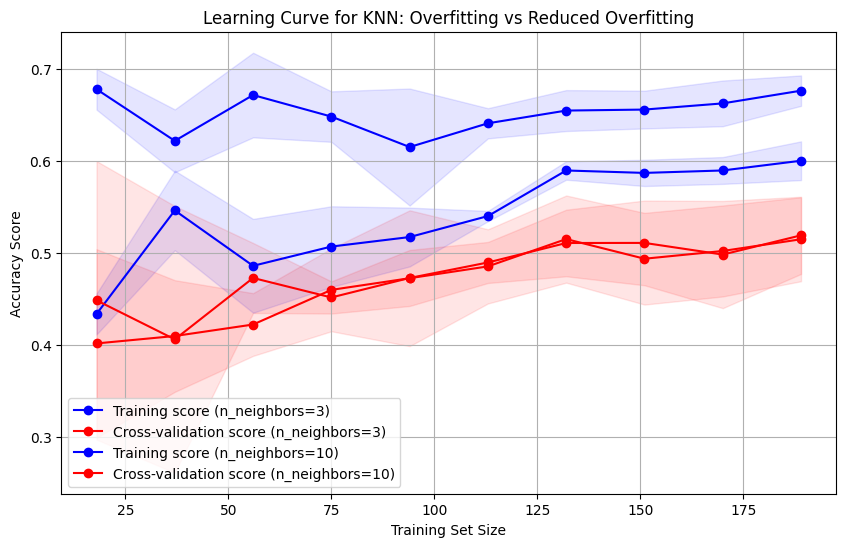

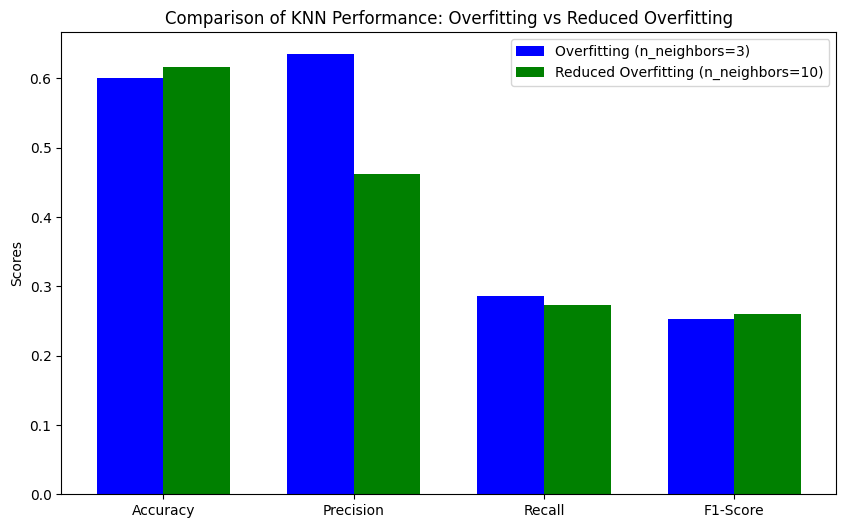

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

# Bước 2: Tiền xử lý dữ liệu
y = df['num']  # Biến mục tiêu cho phân loại
X = df.drop(columns=['num'])  # Các đặc trưng

# Dọn dẹp dữ liệu
X = X.dropna()  # Xóa các hàng có giá trị NaN
y = y[X.index]  # Cập nhật lại y dựa trên chỉ số của X

# Mã hóa biến nhị phân
binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# One-hot encoding cho các biến phân loại
categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Chuẩn hóa các biến số
numeric_cols = ['age', 'trestbps', 'chol', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Bước 3: Phân chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hàm để tính toán và in kết quả
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=1)
    recall = recall_score(y_test, predictions, average='macro', zero_division=1)
    f1 = f1_score(y_test, predictions, average='macro', zero_division=1)

    return accuracy, precision, recall, f1

# So sánh mô hình KNN trước và sau khi giảm overfitting
knn_model_overfit = KNeighborsClassifier(n_neighbors=3)  # Dễ bị overfitting
knn_model_reduced_overfit = KNeighborsClassifier(n_neighbors=10)  # Giảm overfitting

# Kết quả của KNN với ít láng giềng (overfitting)
knn_results_overfit = evaluate_model(knn_model_overfit, X_train, y_train, X_test, y_test)
print("KNN Results with Overfitting (n_neighbors=3):", knn_results_overfit)

# Kết quả của KNN sau khi giảm overfitting
knn_results_reduced_overfit = evaluate_model(knn_model_reduced_overfit, X_train, y_train, X_test, y_test)
print("KNN Results with Reduced Overfitting (n_neighbors=10):", knn_results_reduced_overfit)

# Vẽ Learning Curve cho KNN trước và sau khi giảm overfitting
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Tính toán trung bình và độ lệch chuẩn cho các điểm số
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Vẽ Learning Curve
    plt.plot(train_sizes, train_mean, 'o-', label=f"Training score ({model_name})", color="blue")
    plt.plot(train_sizes, test_mean, 'o-', label=f"Cross-validation score ({model_name})", color="red")

    # Vẽ vùng sai số
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

# Vẽ Learning Curve cho cả hai mô hình KNN
plt.figure(figsize=(10, 6))
plot_learning_curve(knn_model_overfit, X_train, y_train, "n_neighbors=3")
plot_learning_curve(knn_model_reduced_overfit, X_train, y_train, "n_neighbors=10")

plt.title("Learning Curve for KNN: Overfitting vs Reduced Overfitting")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Vẽ biểu đồ so sánh hiệu suất trước và sau khi giảm overfitting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
overfit_scores = knn_results_overfit
reduced_overfit_scores = knn_results_reduced_overfit

x = np.arange(len(labels))  # Vị trí của các nhãn
width = 0.35  # Độ rộng của mỗi cột

# Tạo biểu đồ so sánh
fig, ax = plt.subplots(figsize=(10, 6))

# Biểu đồ so sánh hiệu suất
rects1 = ax.bar(x - width/2, overfit_scores, width, label='Overfitting (n_neighbors=3)', color='blue')
rects2 = ax.bar(x + width/2, reduced_overfit_scores, width, label='Reduced Overfitting (n_neighbors=10)', color='green')

# Thêm một số tùy chỉnh cho biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Comparison of KNN Performance: Overfitting vs Reduced Overfitting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị biểu đồ
plt.show()


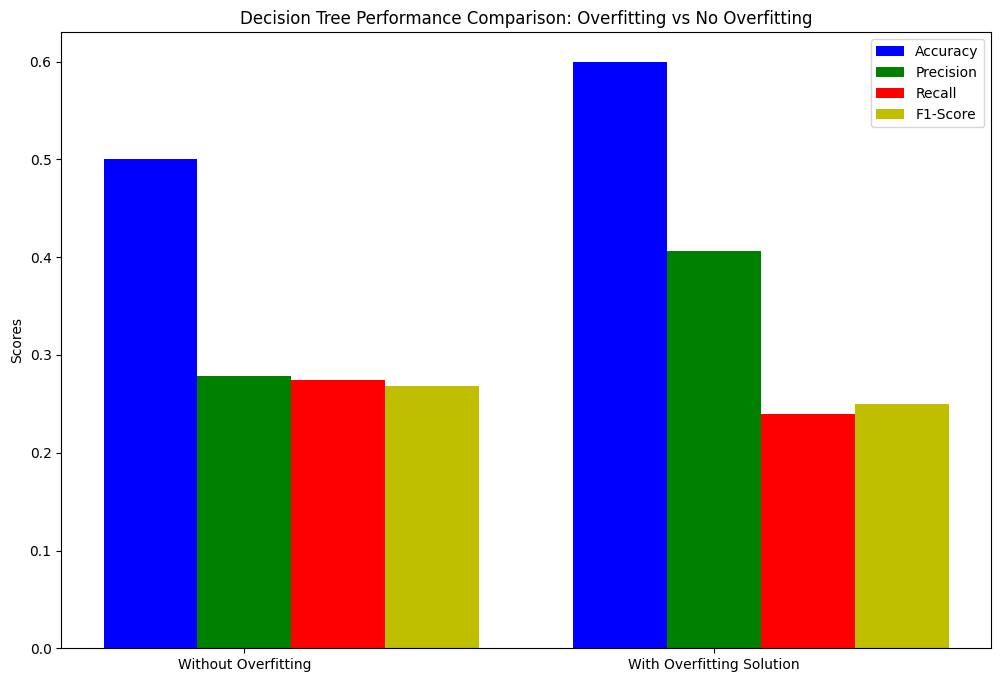

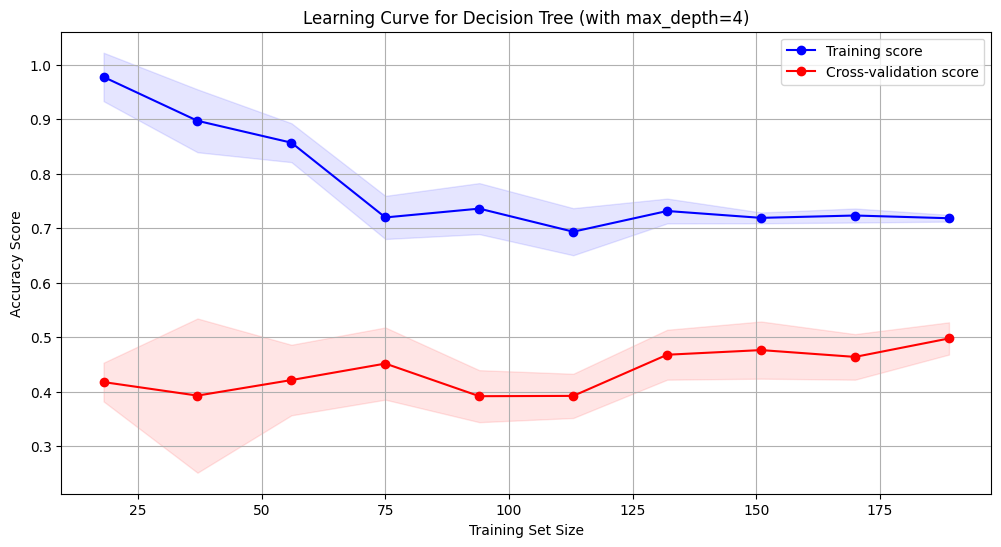

In [ ]:
#Decision Tree
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 1. Decision Tree không giảm overfitting
decision_tree_model = DecisionTreeClassifier(random_state=42)
dt_results_no_overfitting = evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)

# 2. Decision Tree với giải pháp overfitting (Giới hạn độ sâu)
decision_tree_model_overfitting = DecisionTreeClassifier(max_depth=4, random_state=42)  # Giới hạn độ sâu
dt_results_with_overfitting = evaluate_model(decision_tree_model_overfitting, X_train, y_train, X_test, y_test)

# Kết quả
results_dt = {
    'Without Overfitting': dt_results_no_overfitting,
    'With Overfitting Solution': dt_results_with_overfitting
}

# Vẽ biểu đồ so sánh
labels = list(results_dt.keys())
accuracy = [result[0] for result in results_dt.values()]
precision = [result[1] for result in results_dt.values()]
recall = [result[2] for result in results_dt.values()]
f1 = [result[3] for result in results_dt.values()]

x = np.arange(len(labels))  # Vị trí của các nhãn
width = 0.2  # Độ rộng của mỗi cột

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='b')
rects2 = ax.bar(x, precision, width, label='Precision', color='g')
rects3 = ax.bar(x + width, recall, width, label='Recall', color='r')
rects4 = ax.bar(x + 2*width, f1, width, label='F1-Score', color='y')

# Thêm một số tùy chỉnh cho biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Decision Tree Performance Comparison: Overfitting vs No Overfitting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Thêm Learning Curve cho mô hình Decision Tree
train_sizes, train_scores, test_scores = learning_curve(
    decision_tree_model_overfitting, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Tính toán trung bình và độ lệch chuẩn cho Learning Curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ biểu đồ Learning Curve
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
ax2.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation score")

# Vẽ vùng sai số
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

# Thêm tiêu đề và nhãn cho Learning Curve
ax2.set_title("Learning Curve for Decision Tree (with max_depth=4)")
ax2.set_xlabel("Training Set Size")
ax2.set_ylabel("Accuracy Score")
ax2.legend(loc="best")
ax2.grid()

plt.show()

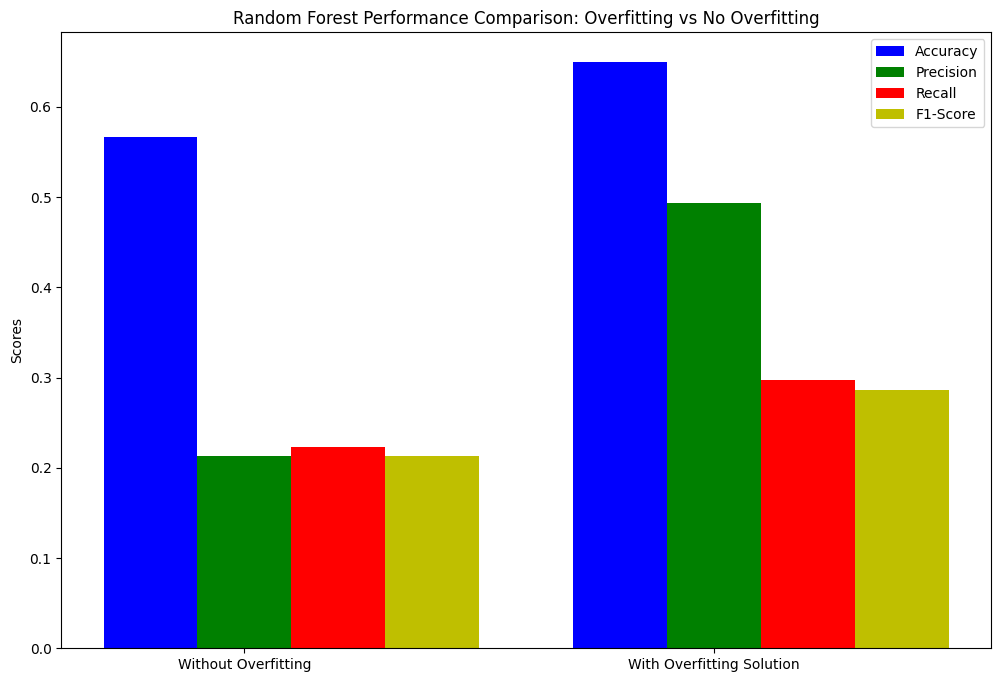

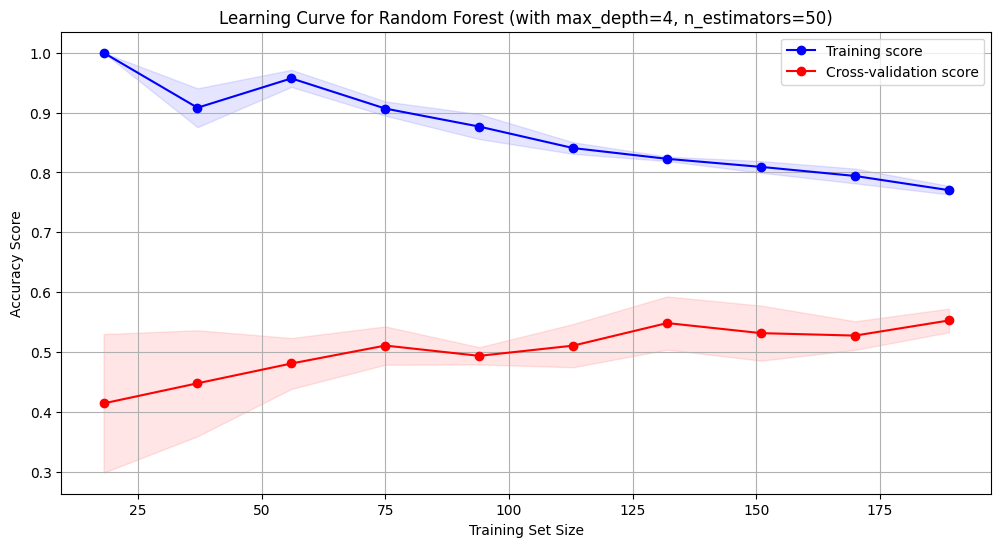

In [10]:
#Random Forest
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier

# 1. Random Forest không giảm overfitting
random_forest_model = RandomForestClassifier(random_state=42)
rf_results_no_overfitting = evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# 2. Random Forest với giải pháp overfitting (Giới hạn độ sâu, số lượng mẫu tối thiểu)
random_forest_model_overfitting = RandomForestClassifier(n_estimators=50, max_depth=4, min_samples_split=5, random_state=42)
rf_results_with_overfitting = evaluate_model(random_forest_model_overfitting, X_train, y_train, X_test, y_test)

# Kết quả
results_rf = {
    'Without Overfitting': rf_results_no_overfitting,
    'With Overfitting Solution': rf_results_with_overfitting
}

# Vẽ biểu đồ so sánh
labels = list(results_rf.keys())
accuracy = [result[0] for result in results_rf.values()]
precision = [result[1] for result in results_rf.values()]
recall = [result[2] for result in results_rf.values()]
f1 = [result[3] for result in results_rf.values()]

x = np.arange(len(labels))  # Vị trí của các nhãn
width = 0.2  # Độ rộng của mỗi cột

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='b')
rects2 = ax.bar(x, precision, width, label='Precision', color='g')
rects3 = ax.bar(x + width, recall, width, label='Recall', color='r')
rects4 = ax.bar(x + 2*width, f1, width, label='F1-Score', color='y')

# Thêm một số tùy chỉnh cho biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Random Forest Performance Comparison: Overfitting vs No Overfitting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Thêm Learning Curve cho mô hình Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_model_overfitting, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Tính toán trung bình và độ lệch chuẩn cho Learning Curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ biểu đồ Learning Curve
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
ax2.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation score")

# Vẽ vùng sai số
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

# Thêm tiêu đề và nhãn cho Learning Curve
ax2.set_title("Learning Curve for Random Forest (with max_depth=4, n_estimators=50)")
ax2.set_xlabel("Training Set Size")
ax2.set_ylabel("Accuracy Score")
ax2.legend(loc="best")
ax2.grid()

plt.show()

# **Câu 3: Feature Selection**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


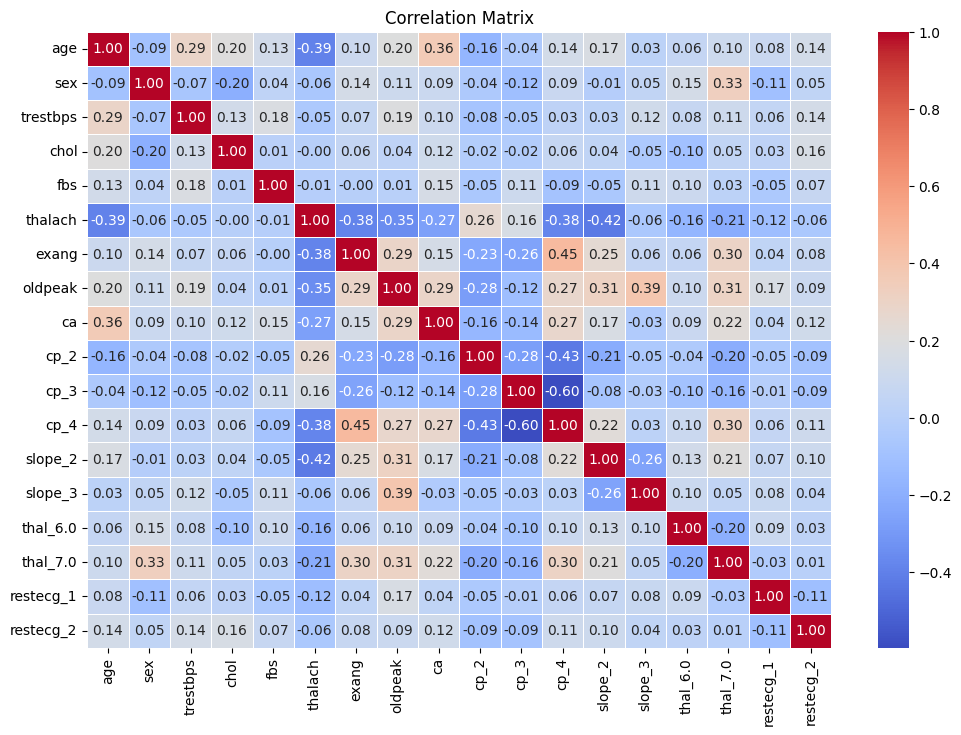

High correlation pairs (greater than 0.9):
        age  sex  fbs  thalach  exang   oldpeak        ca   cp_2   cp_3  \
0  0.936181    1    1      150      0  1.068965 -0.721976  False  False   
1  1.378929    1    0      108      1  0.381773  2.478425  False  False   
2  1.378929    1    0      129      1  1.326662  1.411625  False  False   
3 -1.941680    1    0      187      0  2.099753 -0.721976  False   True   
4 -1.498933    0    0      172      0  0.295874 -0.721976   True  False   

    cp_4  slope_2  slope_3  thal_6.0  thal_7.0  restecg_1  restecg_2  
0  False    False     True      True     False      False       True  
1   True     True    False     False     False      False       True  
2   True     True    False     False      True      False       True  
3  False    False     True     False     False      False      False  
4  False    False    False     False     False      False       True  
Accuracy của K-Nearest Neighbors trước khi chọn lọc tính năng: 0.566666666666666

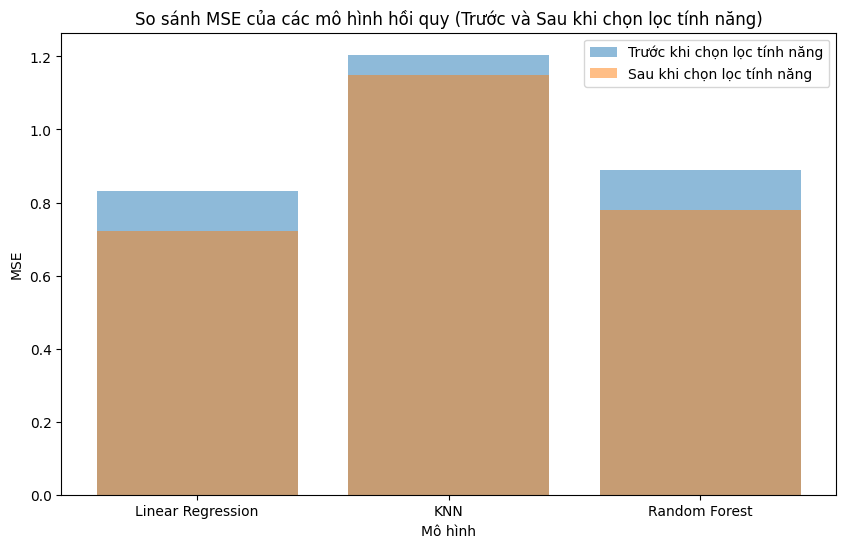

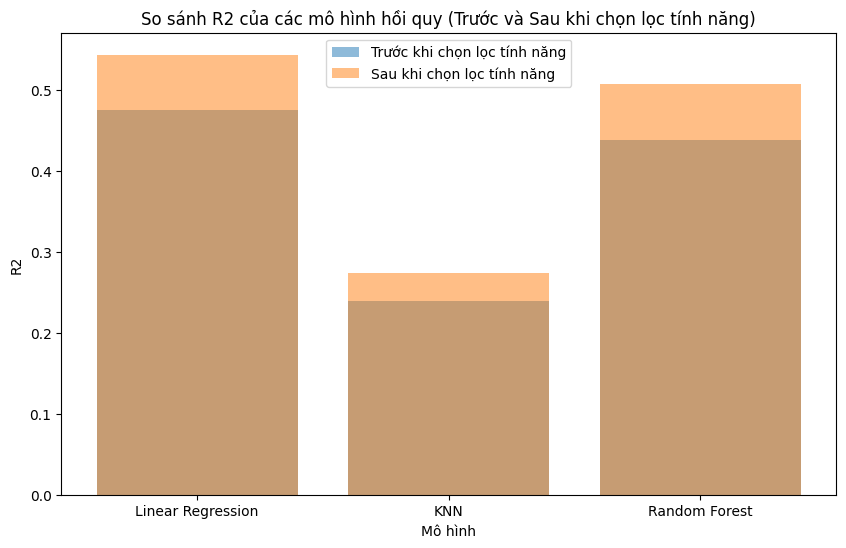

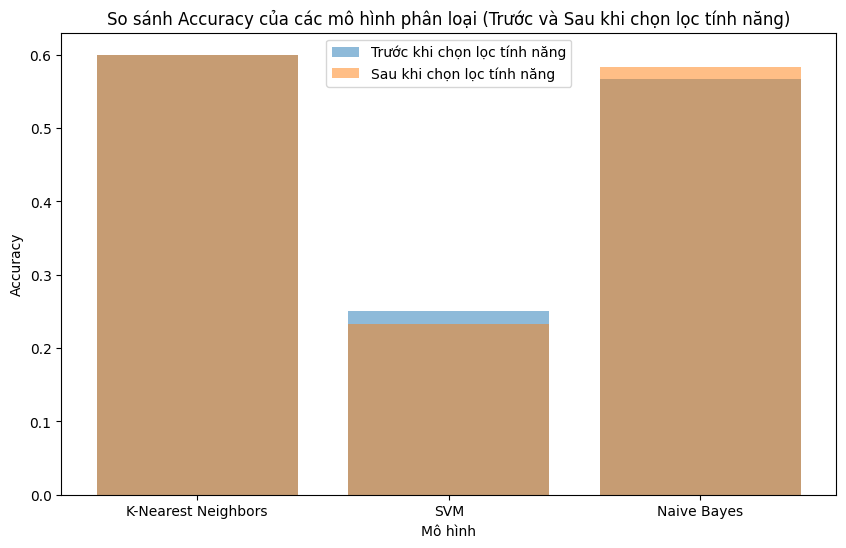

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Đọc dữ liệu từ UCI repository
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

# Kiểm tra thông tin bộ dữ liệu
print(df.info())

# Tiền xử lý dữ liệu
y = df['num']  # Biến mục tiêu
X = df.drop(columns=['num'])

# Dọn dẹp dữ liệu (loại bỏ các dòng có giá trị thiếu)
X = X.dropna()
y = y.loc[X.index]  # Cập nhật lại y dựa trên chỉ số của X

# Mã hóa các biến nhị phân (biến fbs, exang, sex)
binary_cols = ['fbs', 'exang', 'sex']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# Áp dụng one-hot encoding cho các biến phân loại (cp, slope, thal, restecg)
categorical_cols = ['cp', 'slope', 'thal', 'restecg']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Chuẩn hóa các biến số (age, trestbps, chol, oldpeak, ca)
numeric_cols = ['age', 'trestbps', 'chol', 'oldpeak', 'ca']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Tính toán ma trận tương quan giữa các biến
corr_matrix = X.corr()

# Hiển thị ma trận tương quan dưới dạng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Lọc các cặp biến có tương quan cao (ngưỡng 0.9)
threshold = 0.9
high_corr_vars = np.where(abs(corr_matrix) > threshold)

# Tạo danh sách các cặp cột có tương quan cao
high_corr_pairs = [(X.columns[x], X.columns[y]) for x, y in zip(*high_corr_vars) if x != y and x < y]

# In ra các cặp cột có tương quan cao
print(f"High correlation pairs (greater than {threshold}):")
for pair in high_corr_pairs:
    print(pair)

# Loại bỏ các cột có mối tương quan cao
columns_to_drop = ['trestbps', 'chol']  # Các cột có thể được loại bỏ
X_selected = X.drop(columns=columns_to_drop)

# Kiểm tra lại dữ liệu sau khi loại bỏ các cột có tương quan cao
print(X_selected.head())

# Chia dữ liệu thành tập huấn luyện và kiểm tra sau khi chọn lọc tính năng
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# --- Mô hình phân loại trên dữ liệu gốc (Trước khi chọn lọc tính năng) ---

# Chia dữ liệu thành tập huấn luyện và kiểm tra (trước khi chọn lọc tính năng)
X_train_class_original, X_test_class_original, y_train_class_original, y_test_class_original = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier trên dữ liệu gốc
knn_before = KNeighborsClassifier()
knn_before.fit(X_train_class_original, y_train_class_original)
knn_pred_before = knn_before.predict(X_test_class_original)
accuracy_knn_before = accuracy_score(y_test_class_original, knn_pred_before)
print(f"Accuracy của K-Nearest Neighbors trước khi chọn lọc tính năng: {accuracy_knn_before}")

# SVM trên dữ liệu gốc
svm_before = SVC(random_state=42)
svm_before.fit(X_train_class_original, y_train_class_original)
svm_pred_before = svm_before.predict(X_test_class_original)
accuracy_svm_before = accuracy_score(y_test_class_original, svm_pred_before)
print(f"Accuracy của SVM trước khi chọn lọc tính năng: {accuracy_svm_before}")

# Naive Bayes trên dữ liệu gốc
nb_before = GaussianNB()
nb_before.fit(X_train_class_original, y_train_class_original)
nb_pred_before = nb_before.predict(X_test_class_original)
accuracy_nb_before = accuracy_score(y_test_class_original, nb_pred_before)
print(f"Accuracy của Naive Bayes trước khi chọn lọc tính năng: {accuracy_nb_before}")

# Lưu các giá trị độ chính xác trước khi chọn lọc tính năng
accuracy_before_class = [
    accuracy_svm_before,
    accuracy_nb_before,
    accuracy_knn_before
]

# --- Mô hình phân loại sau khi chọn lọc tính năng ---

# K-Nearest Neighbors Classifier sau khi chọn lọc tính năng
knn_after = KNeighborsClassifier()
knn_after.fit(X_train, y_train)
knn_pred_after = knn_after.predict(X_test)
accuracy_knn_after = accuracy_score(y_test, knn_pred_after)
print(f"Accuracy của K-Nearest Neighbors sau khi chọn lọc tính năng: {accuracy_knn_after}")

# SVM sau khi chọn lọc tính năng
svm_after = SVC(random_state=42)
svm_after.fit(X_train, y_train)
svm_pred_after = svm_after.predict(X_test)
accuracy_svm_after = accuracy_score(y_test, svm_pred_after)
print(f"Accuracy của SVM sau khi chọn lọc tính năng: {accuracy_svm_after}")

# Naive Bayes sau khi chọn lọc tính năng
nb_after = GaussianNB()
nb_after.fit(X_train, y_train)
nb_pred_after = nb_after.predict(X_test)
accuracy_nb_after = accuracy_score(y_test, nb_pred_after)
print(f"Accuracy của Naive Bayes sau khi chọn lọc tính năng: {accuracy_nb_after}")

# Lưu các giá trị độ chính xác sau khi chọn lọc tính năng
accuracy_after_class = [
    accuracy_svm_after,
    accuracy_nb_after,
    accuracy_knn_after
]

# --- Hồi quy trên dữ liệu gốc (Trước khi chọn lọc tính năng) ---

# Chia dữ liệu thành tập huấn luyện và kiểm tra (trước khi chọn lọc tính năng)
X_train_reg_original, X_test_reg_original, y_train_reg_original, y_test_reg_original = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression trên dữ liệu gốc
linreg_before = LinearRegression()
linreg_before.fit(X_train_reg_original, y_train_reg_original)
linreg_pred_before = linreg_before.predict(X_test_reg_original)
mse_linreg_before = mean_squared_error(y_test_reg_original, linreg_pred_before)
r2_linreg_before = r2_score(y_test_reg_original, linreg_pred_before)
print(f"MSE của Linear Regression trước khi chọn lọc tính năng: {mse_linreg_before}")
print(f"R2 của Linear Regression trước khi chọn lọc tính năng: {r2_linreg_before}")

# Random Forest Regressor trên dữ liệu gốc
rf_regressor_before = RandomForestRegressor(random_state=42)
rf_regressor_before.fit(X_train_reg_original, y_train_reg_original)
rf_pred_before = rf_regressor_before.predict(X_test_reg_original)
mse_rf_before = mean_squared_error(y_test_reg_original, rf_pred_before)
r2_rf_before = r2_score(y_test_reg_original, rf_pred_before)
print(f"MSE của Random Forest Regressor trước khi chọn lọc tính năng: {mse_rf_before}")
print(f"R2 của Random Forest Regressor trước khi chọn lọc tính năng: {r2_rf_before}")

# KNN trên dữ liệu gốc
knn_before = KNeighborsRegressor()
knn_before.fit(X_train_reg_original, y_train_reg_original)
knn_pred_before = knn_before.predict(X_test_reg_original)
mse_knn_before = mean_squared_error(y_test_reg_original, knn_pred_before)
r2_knn_before = r2_score(y_test_reg_original, knn_pred_before)
print(f"MSE của KNN trước khi chọn lọc tính năng: {mse_knn_before}")
print(f"R2 của KNN trước khi chọn lọc tính năng: {r2_knn_before}")

# Lưu các giá trị MSE và R2 trước khi chọn lọc tính năng
mse_before_reg = [mse_linreg_before,  mse_knn_before, mse_rf_before]
r2_before_reg = [r2_linreg_before, r2_knn_before, r2_rf_before]

# --- Hồi quy sau khi chọn lọc tính năng ---

# Linear Regression sau khi chọn lọc tính năng
linreg_after = LinearRegression()
linreg_after.fit(X_train, y_train)
linreg_pred_after = linreg_after.predict(X_test)
mse_linreg_after = mean_squared_error(y_test, linreg_pred_after)
r2_linreg_after = r2_score(y_test, linreg_pred_after)

# Random Forest Regressor sau khi chọn lọc tính năng
rf_regressor_after = RandomForestRegressor(random_state=42)
rf_regressor_after.fit(X_train, y_train)
rf_pred_after = rf_regressor_after.predict(X_test)
mse_rf_after = mean_squared_error(y_test, rf_pred_after)
r2_rf_after = r2_score(y_test, rf_pred_after)

# KNN sau khi chọn lọc tính năng
knn_after = KNeighborsRegressor()
knn_after.fit(X_train, y_train)
knn_pred_after = knn_after.predict(X_test)
mse_knn_after = mean_squared_error(y_test, knn_pred_after)
r2_knn_after = r2_score(y_test, knn_pred_after)

# Lưu các giá trị MSE và R2 sau khi chọn lọc tính năng
mse_after_reg = [mse_linreg_after,  mse_knn_after, mse_rf_after]
r2_after_reg = [r2_linreg_after,  r2_knn_after,  r2_rf_after]

# --- So sánh MSE và R2 của các mô hình hồi quy trước và sau khi chọn lọc tính năng ---

reg_models = ['Linear Regression', 'KNN', 'Random Forest']

# Vẽ đồ thị so sánh MSE
plt.figure(figsize=(10, 6))
plt.bar(reg_models, mse_before_reg, alpha=0.5, label='Trước khi chọn lọc tính năng')
plt.bar(reg_models, mse_after_reg, alpha=0.5, label='Sau khi chọn lọc tính năng')
plt.xlabel('Mô hình')
plt.ylabel('MSE')
plt.title('So sánh MSE của các mô hình hồi quy (Trước và Sau khi chọn lọc tính năng)')
plt.legend()
plt.show()
# Vẽ đồ thị so sánh R2
plt.figure(figsize=(10, 6))
plt.bar(reg_models, r2_before_reg, alpha=0.5, label='Trước khi chọn lọc tính năng')
plt.bar(reg_models, r2_after_reg, alpha=0.5, label='Sau khi chọn lọc tính năng')
plt.xlabel('Mô hình')
plt.ylabel('R2')
plt.title('So sánh R2 của các mô hình hồi quy (Trước và Sau khi chọn lọc tính năng)')
plt.legend()
plt.show()

# --- So sánh độ chính xác của các mô hình phân loại trước và sau khi chọn lọc tính năng ---
classification_models = ['K-Nearest Neighbors', 'SVM', 'Naive Bayes']
# Vẽ đồ thị so sánh độ chính xác (Accuracy) của các mô hình phân loại
plt.figure(figsize=(10, 6))
plt.bar(classification_models, accuracy_before_class, alpha=0.5, label='Trước khi chọn lọc tính năng')
plt.bar(classification_models, accuracy_after_class, alpha=0.5, label='Sau khi chọn lọc tính năng')
plt.xlabel('Mô hình')
plt.ylabel('Accuracy')
plt.title('So sánh Accuracy của các mô hình phân loại (Trước và Sau khi chọn lọc tính năng)')
plt.legend()
plt.show()